<a href="https://www.kaggle.com/code/sthabile/munich-s-african-book-club-list?scriptVersionId=118024650" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# The *Munich Meets African Literature* Book Club

In May 2018, Nana Kesewaa Dankwa founded a book-club called *Munich Meets African Literature* (MMAL) in the heart of Munich, Germany on the website [*Meetup*](http://meetup.com). The goal of the club was to discuss literary works created by African authors in the 20th and 21st centuries. 

The [MMAL book-club](https://www.meetup.com/Munich-Meets-African-Literature/) has gone on to experience much success with up to 188 registered members participating in monthly meetings of books voted for and selected by members of the group. The group is public and anyone is free to join. 

This notebook provides an exploratory data analysis based on the current list of books which have been selected for discussion. 

![Munich Meets African Literature](https://secure.meetupstatic.com/photos/event/d/4/6/e/highres_468474382.jpeg)

In [1]:
import numpy as np
import pandas as pd
import os

import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

## DATA LOAD

In [2]:
df = pd.read_csv('../input/Munich-Meets-African-Lit.csv', delimiter=';')

## DATA TABLE INSPECTION

In [3]:
df.head(5)

,Country,Region,Book-title,Author,Author Gender,Date Published,Publisher,Date of Meeting,Venue,Time (CET)
0,Zimbabwe,Southern,We Need New Names,NoViolet Bulawayo,F,21.05.13,Reagan Arthur Books,18.05.18,The Munich Readery,18h00
1,Kenya,Eastern,Decolonising the Mind,Ngugi wa Thiong'o,M,16.07.86,Heinemann Educational Books,22.06.18,The Munich Readery,18h00
2,Ghana,Western,Homecoming,Yaa Gyasi,F,15.06.16,Alfred A. Knopf,27.07.18,The Munich Readery,18h00
3,South Africa,Southern,Born a Crime,Trevor Noah,M,15.11.16,Doubleday Canada,17.08.18,Café Jasmin,18h00
4,Nigeria,Western,Binti,Nnedi Okarafor,F,22.09.15,Tor.com,21.09.18,The Munich Readery,18h00


In [4]:
df.tail(5)

,Country,Region,Book-title,Author,Author Gender,Date Published,Publisher,Date of Meeting,Venue,Time (CET)
45,Kenya,Eastern,A Grain of Wheat,Ngugi wa Thiong’o,M,01.01.67,Heinemann Educational Books,30.07.22,Online,17h00
46,Nigeria,Western,Second Class Citizen,Buchi Emecheta,F,01.01.74,Geroge Braziller Inc.,27.08.22,Online,17h00
47,Zimbabwe,Southern,Nervous Conditions,Tsitsi Dangarembga,F,01.01.88,Seal Press,24.09.22,Online,17h00
48,Nigeria,Western,The Famished Road,Ben Okri,M,01.01.91,Anchor,29.10.22,Online,17h00
49,Namibia,Southern,The Purple Violet of Oshaantu,Neshani Andreas,F,30.10.01,Heinemann Educational Books,26.11.22,Online,17h00



## COUNTRIES

#### The main selection criteria for a book is the nationality of the author. Care is taken to ensure that the books selected are from as many countries within the continent as possible. This has not prevented a slight over-representation of a few countries. 

In [5]:
df_countries = df.groupby(['Country'])
x = df_countries['Country'].count().reset_index(name='Count').sort_values(['Count'], ascending=0)

fig = go.Figure( go.Bar(
              x = x.Count[::-1],
              y = x.Country[::-1],
              orientation='h', 
              opacity=0.5, 
              marker=dict(color='rgba(207, 0, 15, 1)')
                        )
               )

fig.update_traces(marker_line_color='rgb(10,48,107)')
fig.update_layout(title_text='Number of a Country\'s Appearances on the Book Club List', 
                  xaxis_title='Count', 
                  yaxis_title='Countries') 

#### Nigerian authors have been selected much more frequently since the inception of the book club. Seeing this on a pie-chart makes the dominance of Nigerian books clearer within the sample. 

In [6]:
px.pie(df_countries, x['Country'], x['Count'], 
       color_discrete_sequence=px.colors.sequential.Rainbow_r, 
       title="Proportion of a Country's Appearances on the Book Club List")


## AFRICAN REGIONS
#### In addition to checking the representation of countries within the book club, we can view that of the the regions within the continent which may or may not follow a similar bias. 

In [7]:
df_countries = df.groupby(['Region'])
x = df_countries['Region'].count().reset_index(name='Count').sort_values(['Count'], ascending=0)

px.pie(df_countries, x['Region'], x['Count'], 
       color_discrete_sequence=px.colors.sequential.Hot, 
       title="Regional Appearances on the Book Club List")


## GENDER

#### During selection of the book, no explicit discussion about the assumed gender of the author selected takes place. The main focus for considering a book selection is the nationality. A skewed gender distribution is thus likely to result from implicit biases regarding the perceived gender of the author. 

In [8]:
df_gender = df.groupby(['Author Gender'])
x = df_gender['Author Gender'].count().reset_index(name='Count').sort_values(['Count'], ascending=0)


px.pie(df_gender, x['Author Gender'], x['Count'], 
       color_discrete_sequence=px.colors.sequential.Bluered, 
       title="Gender identity of selected Authors")


## PUBLISHERS

#### For a publishing house to take on a book, it would need to have tremendous faith in the book's potential future successes on the market. Chinua Achebe's classic 'Things Fall Apart' was rejected by several publishing houses prior to its publication by Heinemann due to the perceived lack of interest in African stories at the time. Heinemann's risky decision to represent Achebe led to the dissemination of one of the most impactful pieces of literature within the African and, dare I say, global canon. 

In [9]:
df_publisher = df.groupby(['Publisher'])
x = df_publisher['Publisher'].count().reset_index(name='Count').sort_values(['Count'], ascending=0)

fig = go.Figure( go.Bar(
              x = x.Count[::-1],
              y = x.Publisher[::-1],
              orientation='h', 
              opacity=0.5, 
              marker=dict(color='rgba(60, 179, 113, 1)')
                        )
               )

fig.update_traces(marker_line_color='rgb(60, 179, 113)')
fig.update_layout(title_text='Publishers representing authors on Book List', 
                  xaxis_title='Count', 
                  yaxis_title='Publishing Houses') 

## YEAR OF PUBLICATION

In [10]:
# The years are read in as DD.MM.YY format 
# We can get the full names of the years by switching from YY to YYYY

years = [ x[-2:] for x in df['Date Published'] ]

years_full = []
for y in years: 
    if 0 < float(y) < 20: 
        years_full.append('20'+y)
    else: 
        years_full.append('19'+y)

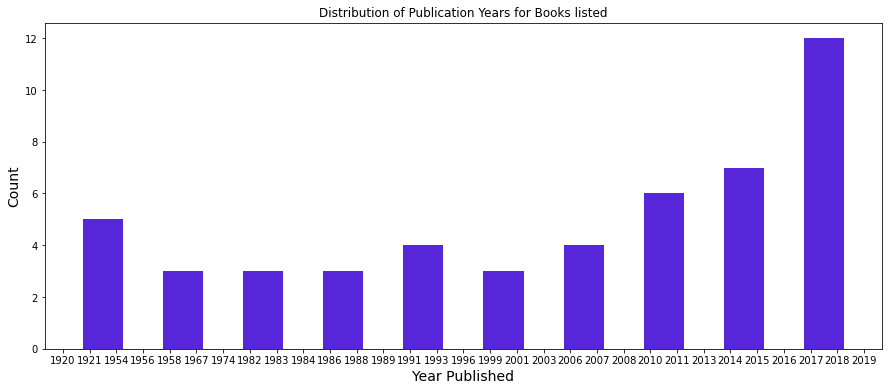

In [11]:
years_full = sorted(years_full)

plt.figure(figsize=(15,6))
def plot(x, x_label, color, r):
    fs = 14
    plt.hist(x, align='mid', rwidth=r, color=color)
    plt.xlabel(x_label, fontsize=fs)
    plt.ylabel('Count', fontsize=fs)
    plt.xticks(fontsize=10)
    
    
plot(years_full, 'Year Published', '#5726D8', 0.5)
plt.title('Distribution of Publication Years for Books listed')
plt.show()

### This notebook will be continuously updated every six months as new data rows are added. Thanks for reading!